[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/road-glare-removal-tests/blob/master/mapping.ipynb)

In [33]:
# !pip install moviepy
# !pip install imutils
# import cv2
# import time
# import matplotlib.pyplot as plt
# import moviepy
# from moviepy.editor import VideoFileClip
# import glob
# %matplotlib inline
# import numpy as np
# import imutils
# !python -V
# !pip3 install opencv-contrib-python

    100% |████████████████████████████████| 30.6MB 1.3MB/s 


In [12]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()

# !mv "VID_20180906_183242263.mp4" "test8.mp4"
# !mv "VID_20180905_230058440.mp4" "test2.mp4"
# !mv "VID_20180905_230112639.mp4" "test3.mp4"
!ls -lrt
# !mkdir "video_frames"

Saving merge1.jpg to merge1.jpg
Saving merge2.jpg to merge2.jpg
Saving merge3.jpg to merge3.jpg
total 96604
drwxr-xr-x 2 root root     4096 Sep  6 17:46 sample_data
-rw-r--r-- 1 root root 10079771 Sep 10 06:13 test1.mp4
-rw-r--r-- 1 root root 11128980 Sep 10 06:13 test2.mp4
-rw-r--r-- 1 root root 14292943 Sep 10 06:13 test3.mp4
-rw-r--r-- 1 root root 11398873 Sep 10 06:13 test4.mp4
-rw-r--r-- 1 root root 15837610 Sep 10 06:13 test5.mp4
-rw-r--r-- 1 root root  7619569 Sep 10 06:13 test6.mp4
-rw-r--r-- 1 root root 13524140 Sep 10 06:13 test7.mp4
-rw-r--r-- 1 root root  7791535 Sep 10 06:13 test8.mp4
-rw-r--r-- 1 root root  2486380 Sep 10 07:03 merge1.jpg
-rw-r--r-- 1 root root  2564627 Sep 10 07:03 merge2.jpg
-rw-r--r-- 1 root root  2168783 Sep 10 07:03 merge3.jpg


In [0]:

# def process(curr,next):
#   return cv2.calcOpticalFlowFarneback(curr,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)   #pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags


import random
def Generate_points(x,low,high):
  points=[]
  for i in range(100):
    points.append(np.asarray([[x , random.randint(low,high)]]))
#   print(np.asarray(points))
  return np.asarray(points)#.reshape(-1,1,2).astype(np.float32)
    

-1 -5 2 3
1 -3 3 3
3 -3 3 3
1 -4 4 4
2 -2 3 2
4 -2 2 2
4 -1 2 3
3 -2 2 2
3 0 1 2
5 -1 3 2
3 0 2 3
1 -2 2 3
1 -3 2 2
1 -4 2 2
0 -4 1 1
0 -3 0 1
1 -2 1 1
2 0 1 1
4 2 2 1
6 3 3 2
5 2 2 3
4 0 3 4
1 -1 3 2
1 -3 3 2
0 -2 3 2
1 -1 2 3
2 -1 3 2
3 -1 3 4
1 -1 5 3
2 -1 1 1
4 1 1 1
2 1 1 0
3 -2 1 0
1 0 1 2
-2 -4 0 1
-1 -3 0 2
-1 -1 -1 0
-1 -3 -2 -1
-2 -2 -3 -2
-1 -3 -2 0
-1 -4 -1 -1
0 -3 -1 -2
1 -4 -1 0
2 -2 -1 -1
0 -2 -1 -1
2 -2 0 -1
0 -2 0 -1
0 -2 1 -1
0 -2 2 -1
-1 -2 0 -1
-3 -2 2 -1
2 -2 2 -1
4 -2 3 -1
3 -2 2 -1
2 -2 2 -1
0 -2 1 -1
-2 -2 -1 -1
-1 -2 -2 -1
1 -2 1 -1
2 -2 0 -1
-1 -2 1 -1
0 -2 1 -1
-2 -2 1 -1
-1 -2 1 -1
-1 -2 0 -1
-1 -2 1 -1
-1 -2 1 -1
0 -2 0 -1
1 -2 -1 -1
0 -2 -1 -1
0 -2 0 -1
-1 -2 -1 -1
-3 -2 -1 -1
-2 -2 0 -1
-1 -2 0 -1
0 -2 0 -1
-1 -2 0 -1
0 -2 -1 -1
1 -2 -1 -1
1 -2 0 -1
0 -2 0 -1
1 -2 0 -1
0 -2 0 -1
-1 -2 0 -1
-2 -2 0 -1
-2 -2 1 -1
-3 -2 1 -1
-3 -2 0 -1
-3 -2 -1 -1
-3 -2 -1 -1
-2 -2 0 -1
0 -2 -1 -1
5 -2 -1 -1
8 -2 -2 -1
7 -2 -1 -1
4 -2 -1 -1
0 -2 -2 -1
-4 -2 -1 -1
-3 -2 0 -1


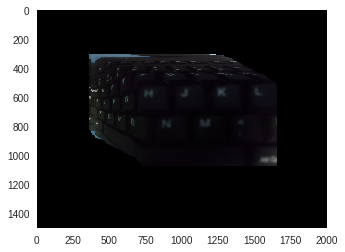

In [11]:
import cv2 as cv
cap = cv.VideoCapture('test8.mp4')
blank_image = np.zeros((1500,2000,3), np.uint8)
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_frame=cv.resize(old_frame,(720,480))
offsetx=400
offsety=400

old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
ho,wo= old_gray.shape[0],old_gray.shape[1]
blank_image[offsety:offsety+ho,offsetx:offsetx+wo,:]=old_frame
n=10
pl0 = Generate_points(wo/n,1,ho).reshape(-1,1,2).astype(np.float32)
pr0 = Generate_points(wo*(n-1)/n,1,ho).reshape(-1,1,2).astype(np.float32) 

# pl0 = np.asarray([[[wo/n,ho*(n/5)/n]],[[wo/n,ho*(n/4)/n]],[[wo/n,ho*(n/3)/n]],[[wo/n,ho*(n/2)/n]],[[wo/n,ho*(n/1.5)/n]]])
# pl0 = np.array(pl0).reshape(-1,1,2).astype(np.float32) 
# pr0 = np.asarray([[[wo*(n-1)/n,ho*(n/5)/n]],[[wo*(n-1)/n,ho*(n/4)/n]],[[wo*(n-1)/n,ho*(n/3)/n]],[[wo*(n-1)/n,ho*(n/2)/n]],[[wo*(n-1)/n,ho*(n/1.5)/n]]])
# pr0 = np.array(pr0).reshape(-1,1,2).astype(np.float32)

# Create a mask image for drawing purposes
# mask = np.zeros_like(old_frame)
counter=0

while(ret):
    counter+=1
    ret,frame = cap.read()
#     counter%3!=0 or 
    if(ret==False):
      continue
    
#     print(ret)
    frame= cv.resize(frame,(720,480))
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    pl1, stl, errl = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, pl0, None, **lk_params)
    pr1, str, errr = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, pr0, None, **lk_params)
#     print(pl1)
    good_newl = pl1[stl==1]
    good_oldl = pl0[stl==1]
    good_newr = pr1[str==1]
    good_oldr = pr0[str==1]
#     print(pr1.size,pr0.size)
#     good_newl = pl1[errl<np.mean(errl)]
#     good_oldl = pl0[errl<np.mean(errl)]
#     good_newr = pr1[errr<np.mean(errr)]
#     good_oldr = pr0[errr<np.mean(errr)] 
#     print(pr1.size,pr0.size,good_newr.size,good_oldr.size)
    
    try:
      try:  
        x_deflection_l=int(np.mean(good_newl[:,0]))-int(np.mean(good_oldl[:,0]))
        y_deflection_l=int(np.mean(good_newl[:,1]))-int(np.mean(good_oldl[:,1]))
        x_deflection_r=int(np.mean(good_newr[:,0]))-int(np.mean(good_oldr[:,0]))
        y_deflection_r=int(np.mean(good_newr[:,1]))-int(np.mean(good_oldr[:,1]))
      except:
        pass
      print(x_deflection_l, x_deflection_r, y_deflection_l, y_deflection_r)

  #     if abs(x_deflection_l)==abs(x_deflection_r) and x_deflection_l!=x_deflection_r:
      if x_deflection_l*x_deflection_r<0:  #handling z axis
        change=(x_deflection_l-x_deflection_r)
        ho= ho+int(change*ho/wo)
        wo= wo+change
        offsety-=int(change//2)
        offsetx-=int(change//2)
#         print("resizing", ho, wo,change)
  #     if(y_deflection_l*y_deflection_r<0):
  #       print("rotating", y_deflection_l-y_deflection_r)
      frame= cv.resize(frame,(wo,ho))



      offsety=offsety- (y_deflection_l+y_deflection_r)//2
      offsetx=offsetx- (x_deflection_l+x_deflection_r)//2
  #     print(offsety, offsety+ho, offsetx, offsetx+wo, ho, wo,frame.shape )
      blank_image[offsety:offsety+ho,offsetx:offsetx+wo,:]=frame
    except:
      print("1")
      pass
    old_gray = frame_gray.copy()

#     frame = imutils.rotate(frame, angle)
    pl0 = Generate_points(wo/n,1,ho-1).reshape(-1,1,2).astype(np.float32)
    pr0 = Generate_points(wo*(n-1)/n,1,ho-1).reshape(-1,1,2).astype(np.float32) 
    
    
cv.destroyAllWindows()
cap.release()


plt.imshow(blank_image)
plt.grid(False)

In [0]:
    x_diflection=int(np.sum(good_newl[:,0]*-1*good_new_errl/np.sum(-1*good_new_errl)))-int(np.sum(good_oldl[:,0]*-1*good_new_errl/np.sum(-1*good_new_errl)))
    y_diflection=int(np.sum(good_newl[:,0]*-1*good_new_errl/np.sum(-1*good_new_errl)))-int(np.sum(good_oldl[:,0]*-1*good_new_errl/np.sum(-1*good_new_errl)))

In [0]:
    # draw the tracks
#     for i,(new,old) in enumerate(zip(good_new,good_old)):
#         a,b = new.ravel()
#         c,d = old.ravel()
#         mask = cv.line(mask, (a,b),(c,d), color[i].tolist(), 2)
#         frame = cv.circle(frame,(a,b),5,color[i].tolist(),-1)
#     img = cv.add(frame,mask)
#     plt.imshow(img)
#     k = cv.waitKey(30) & 0xff
#     if k == 27:
#         break
    # Now update the previous frame and previous points

In [0]:
import numpy as np
import imutils
import cv2
 
class Stitcher:
  def __init__(self):
    # determine if we are using OpenCV v3.X
    self.isv3 = imutils.is_cv3()
    print(self.isv3)
    
    
  def stitch(self, images, ratio=0.75, reprojThresh=4.0, showMatches=False):
    # unpack the images, then detect keypoints and extract
    # local invariant descriptors from them
    (imageB, imageA) = images
    (kpsA, featuresA) = self.detectAndDescribe(imageA)
    (kpsB, featuresB) = self.detectAndDescribe(imageB)
    
    # match features between the two images
    M = self.matchKeypoints(kpsA, kpsB,featuresA, featuresB, ratio, reprojThresh)
 
    # if the match is None, then there aren't enough matched
    # keypoints to create a panorama
    if M is None:
      return None

    # otherwise, apply a perspective warp to stitch the images
    # together
    (matches, H, status) = M
    result = cv2.warpPerspective(imageA, H,(imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
    result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB

    # check to see if the keypoint matches should be visualized
    if showMatches:
      vis = self.drawMatches(imageA, imageB, kpsA, kpsB, matches,status)

      # return a tuple of the stitched image and the
      # visualization
      return (result, vis)

    # return the stitched image
    return result
  
  def detectAndDescribe(self, image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # check to see if we are using OpenCV 3.X
    if self.isv3:
      # detect and extract features from the image
      descriptor = cv2.xfeatures2d.SIFT_create()
      (kps, features) = descriptor.detectAndCompute(image, None)

    # otherwise, we are using OpenCV 2.4.X
    else:
      # detect keypoints in the image
      detector = cv2.FeatureDetector_create("SIFT")
      kps = detector.detect(gray)

      # extract features from the image
      extractor = cv2.DescriptorExtractor_create("SIFT")
      (kps, features) = extractor.compute(gray, kps)

    # convert the keypoints from KeyPoint objects to NumPy
    # arrays
    kps = np.float32([kp.pt for kp in kps])

    # return a tuple of keypoints and features
    return (kps, features)
  
  
  def matchKeypoints(self, kpsA, kpsB, featuresA, featuresB,ratio, reprojThresh):
    # compute the raw matches and initialize the list of actual
    # matches
    matcher = cv2.DescriptorMatcher_create("BruteForce")
    rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
    matches = []

    # loop over the raw matches
    for m in rawMatches:
      # ensure the distance is within a certain ratio of each
      # other (i.e. Lowe's ratio test)
      if len(m) == 2 and m[0].distance < m[1].distance * ratio:
        matches.append((m[0].trainIdx, m[0].queryIdx))
    # computing a homography requires at least 4 matches
    if len(matches) > 4:
      # construct the two sets of points
      ptsA = np.float32([kpsA[i] for (_, i) in matches])
      ptsB = np.float32([kpsB[i] for (i, _) in matches])

      # compute the homography between the two sets of points
      (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,reprojThresh)

      # return the matches along with the homograpy matrix
      # and status of each matched point
      return (matches, H, status)

    # otherwise, no homograpy could be computed
    return None
  
  
  def drawMatches(self, imageA, imageB, kpsA, kpsB, matches, status):
    # initialize the output visualization image
    (hA, wA) = imageA.shape[:2]
    (hB, wB) = imageB.shape[:2]
    vis = np.zeros((max(hA, hB), wA + wB, 3), dtype="uint8")
    vis[0:hA, 0:wA] = imageA
    vis[0:hB, wA:] = imageB

    # loop over the matches
    for ((trainIdx, queryIdx), s) in zip(matches, status):
      # only process the match if the keypoint was successfully
      # matched
      if s == 1:
        # draw the match
        ptA = (int(kpsA[queryIdx][0]), int(kpsA[queryIdx][1]))
        ptB = (int(kpsB[trainIdx][0]) + wA, int(kpsB[trainIdx][1]))
        cv2.line(vis, ptA, ptB, (0, 255, 0), 1)

    # return the visualization
    return vis

  
  

In [35]:
imageA = cv2.imread('merge1.jpg')
imageB = cv2.imread('merge2.jpg')
imageA = imutils.resize(imageA, width=400)
imageB = imutils.resize(imageB, width=400)
 
# stitch the images together to create a panorama
stitcher = Stitcher()
(result, vis) = stitcher.stitch([imageA, imageB], showMatches=True)
 
# show the images
cv2.imshow("Image A", imageA)
cv2.imshow("Image B", imageB)
cv2.imshow("Keypoint Matches", vis)
cv2.imshow("Result", result)
cv2.waitKey(0)

True


AttributeError: ignored